c:\Users\M__zzZ\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


-------第0轮训练开始-------
训练次数：1，loss:389.27716064453125
训练次数：2，loss:226.30831909179688
训练次数：3，loss:86.46638488769531
训练次数：4，loss:196.87098693847656
训练次数：5，loss:32.495521545410156
训练次数：6，loss:33.59770965576172
训练次数：7，loss:72.72754669189453
训练次数：8，loss:390.2918395996094
训练次数：9，loss:34.215030670166016
训练次数：10，loss:90.25933837890625
训练次数：11，loss:274.0084228515625
训练次数：12，loss:17.936038970947266
tensor([[0.4827],
        [0.4642],
        [0.4764],
        [0.5298],
        [0.4965],
        [0.4745],
        [0.5655],
        [0.4547],
        [0.4786],
        [0.5012],
        [0.5362],
        [0.4605],
        [0.4812],
        [0.5184],
        [0.6750],
        [0.4811],
        [0.5501],
        [0.5845],
        [0.5706],
        [0.4862],
        [0.4962],
        [0.4928],
        [0.4808],
        [0.4710],
        [0.4617],
        [0.4831],
        [0.5012],
        [0.4845],
        [0.4700],
        [0.4671],
        [0.4864],
        [0.5789],
        [0.4767],
        [0.5423

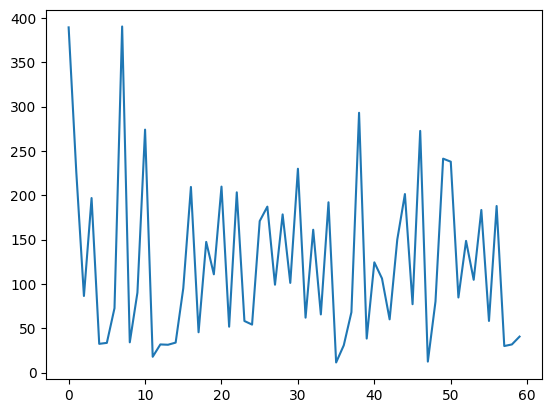

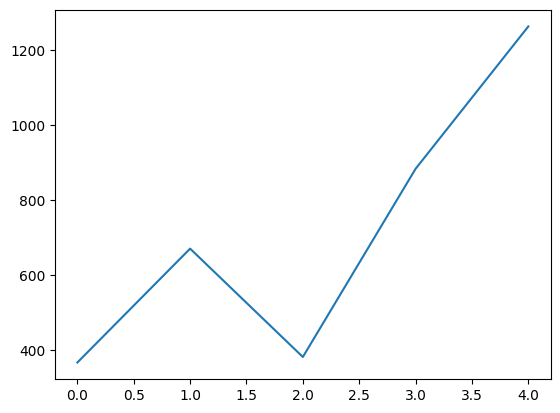

precision: 0.47557117750439365
recall: 0.9669811320754716
F1Score：0.6375759860515526


In [11]:
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from LinearRegress_model import *
from Dataset import *
import matplotlib.pyplot as plt

# 加载训练数据
myTrainData = MyDataSet("origin_breast_cancer_data.csv")
# 将batch_size设置成50，表示每一次迭代取出50个数据。
TrainLoader = DataLoader(dataset=myTrainData, batch_size=50, shuffle=True)
# 加载测试数据
myTestData = MyDataSet("origin_breast_cancer_data.csv")
ValidationLoader = DataLoader(dataset=myTestData, batch_size=50, shuffle=True)
# 创建网络模型
myModel = LinearRegress(inputsize=1, outputsize=1)
# 损失函数
loss_fn = nn.BCELoss(size_average=False)
# 学习率
learning_rate = 1e-4

# 优化器
optimizer = torch.optim.SGD(myModel.parameters(), lr=learning_rate)
# 总共的训练步数
total_train_step = 0
# 总共的测试步数
total_test_step = 0
step = 0
epoch = 5
# Tensorboard的writer实例，用于记录训练过程中的LOSS变化
writer = SummaryWriter("logs")
train_loss_his = []
test_totalloss_his = []

predictions = 0
TPs = 0
numOfPositiveLabel = 0
# 判断预测是否成功的超参
a = 0.5
for i in range(epoch):
    print(f"-------第{i}轮训练开始-------")
    # 这一部分是模型训练
    for data1 in TrainLoader:
        # 注意这里是取了一个batchsize的数据，该例batchsize=50，因此取了50个数据
        x1,y1 = data1
        # 把输入扔给模型，得到预测输出output
        output1 = myModel(x1)
        # 计算预测输出output和真是输出y之间的LOSS
        loss = loss_fn(output1, y1)
        # 将梯度清零，好像这一步必须要
        optimizer.zero_grad()
        # 反向传播，计算梯度
        loss.backward()
        # 优化一次参数
        optimizer.step()
        # 总的迭代次数加1
        total_train_step = total_train_step + 1
        # 将当前的LOSS放到LOSS记录的list中
        train_loss_his.append(loss.detach().numpy())
        # 将当前的LOSS记录到tensorboard的中
        writer.add_scalar("train_loss", loss.item(), total_train_step)
        print(f"训练次数：{total_train_step}，loss:{loss}")
        
    # 下面这段代码是模型测试
    total_test_loss = 0
    # 这里告诉代码不用求梯度了
    with torch.no_grad():
        for data2 in ValidationLoader:
            x2, y2 = data2
            output2 = myModel(x2)
            loss = loss_fn(output2, y2)
            
            print(output2)
            for tmp in range(len(output2)):
                total_test_step = total_test_step + 1
                if(y2[tmp] == 1):
                    numOfPositiveLabel = numOfPositiveLabel + 1

                if(output2[tmp]>= a):
                    if(y2[tmp] == 1):
                        predictions = predictions + 1
                        TPs = TPs + 1
                else:
                    if(y2[tmp] == 0):
                        predictions = predictions + 1
            
            # 这里求一个epoch的总loss
            total_test_loss = total_test_loss + loss
        
        print(f"测试集上的loss：{total_test_loss}")
        test_totalloss_his.append(total_test_loss.detach().numpy())
        writer.add_scalar("test_loss", total_test_loss.item(), i)
# 输出线性模型的两个参数，分别是权重和偏置
for parameters in myModel.parameters():
    print(parameters)
writer.close()
# 画出训练损失变化曲线
plt.plot(train_loss_his)
plt.show()
# 画出测试损失变化曲线
plt.plot(test_totalloss_his)
plt.show()
#计算精确度
precision = predictions/total_test_step
print(f"precision: {precision}")
#计算召回率
recall = TPs/numOfPositiveLabel
print(f"recall: {recall}")
#计算F1得分
print(f"F1Score：{2 * (recall*precision)/(recall+precision)}")